In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot

In [2]:
all_data=pd.read_csv('/content/Sales Data.csv')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0.0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7.0
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18.0
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15.0
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12.0


**Data Cleaning and formating**




In [3]:
all_data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                float64
dtype: object

In [4]:
all_data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                1
dtype: int64

In [5]:
all_data=all_data.dropna(how='all')
all_data.shape

(43277, 11)

**What is the best Month for sale?**

In [6]:
'12/28/2019 5:19'.split('/')[0]

'12'

In [7]:
import math
def month(x):
    if isinstance(x, (float, int)) and math.isnan(x):
        return 'Unknown'
    else:
        return str(x).split('/')[0]

**Add month col**

In [8]:
all_data['Month'] = all_data['Order Date'].apply(month)

In [9]:
all_data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
City                 object
Hour                float64
dtype: object

In [10]:
all_data['Month'].unique()

array(['2019-12-30 00:01:00', '2019-12-29 07:03:00',
       '2019-12-12 18:21:00', ..., '2019-04-09 17:15:00',
       '2019-04-15 16:02:00', '2019-04-14 15:09:00'], dtype=object)

In [11]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

43277

In [12]:
all_data=all_data[~filter]

In [13]:
all_data.shape

(43277, 11)

In [14]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,1700.00,New York City,0.0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,600.00,New York City,7.0
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,11.95,New York City,18.0
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,149.99,San Francisco,15.0
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,11.95,Atlanta,12.0


In [15]:
all_data['Month']

0        2019-12-30 00:01:00
1        2019-12-29 07:03:00
2        2019-12-12 18:21:00
3        2019-12-22 15:13:00
4        2019-12-18 12:38:00
                ...         
43272    2019-04-09 17:15:00
43273    2019-04-08 17:11:00
43274    2019-04-15 16:02:00
43275    2019-04-28 14:36:00
43276    2019-04-14 15:09:00
Name: Month, Length: 43277, dtype: object

In [16]:
all_data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
City                 object
Hour                float64
dtype: object

In [17]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [18]:
all_data = all_data.dropna(subset=['Quantity Ordered'])

In [19]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [20]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,1700.00,New York City,0.0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,600.00,New York City,7.0
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,11.95,New York City,18.0
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,149.99,San Francisco,15.0
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,11.95,Atlanta,12.0


In [21]:
all_data.groupby('Month')['Sales'].sum()

Month
2019-04-01 03:09:00     14.95
2019-04-01 04:12:00     11.99
2019-04-01 05:06:00    149.99
2019-04-01 05:18:00     11.95
2019-04-01 05:58:00    109.99
                        ...  
2020-01-01 04:06:00    149.99
2020-01-01 04:13:00      2.99
2020-01-01 04:21:00     11.95
2020-01-01 04:54:00     99.99
2020-01-01 05:13:00    114.94
Name: Sales, Length: 30887, dtype: float64

**Which city has max order**

In [22]:
def city (x):
  return x.split(',')[1]

In [23]:
all_data['City']=all_data['Purchase Address'].apply(city)

In [24]:
all_data.groupby('City')['City'].count()

City
 Atlanta           3460
 Austin            2323
 Boston            4615
 Dallas            3355
 Los Angeles       6920
 New York City     5842
 Portland          2885
 San Francisco    10458
 Seattle           3419
Name: City, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

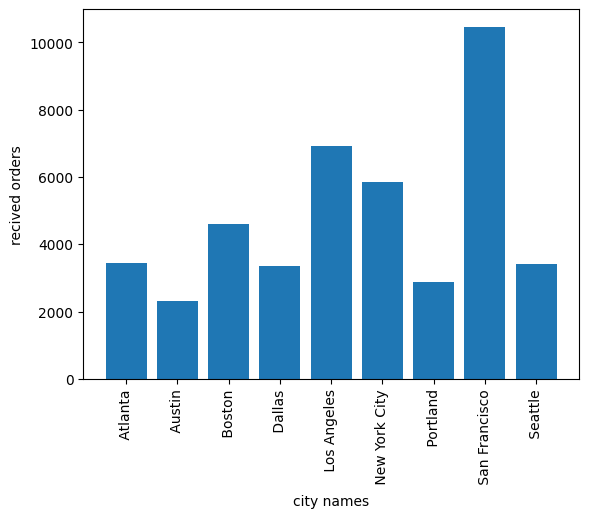

In [25]:
plt.bar(all_data.groupby('City')['City'].count().index,all_data.groupby('City')['City'].count())
plt.xticks(rotation='vertical')
plt.ylabel('recived orders')
plt.xlabel('city names')
plt.show

**What time should we display advertisements to maxmaize for product purchase?**



In [27]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [28]:
keys=[]
hours=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour_df))

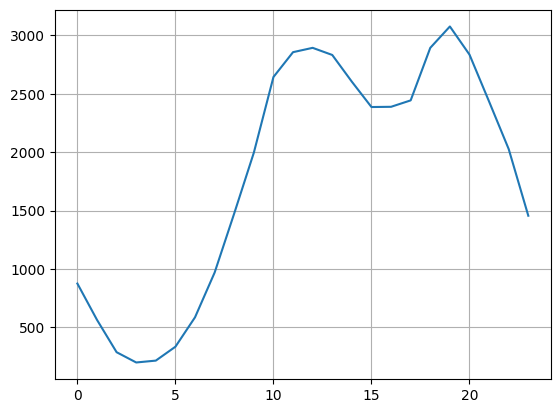

In [30]:
plt.grid()
plt.plot(keys,hours)

*between 12pm and 7pm is probably the best time to advertise to maximise product purchase what product sold the most ? why?*

<Axes: xlabel='Product'>

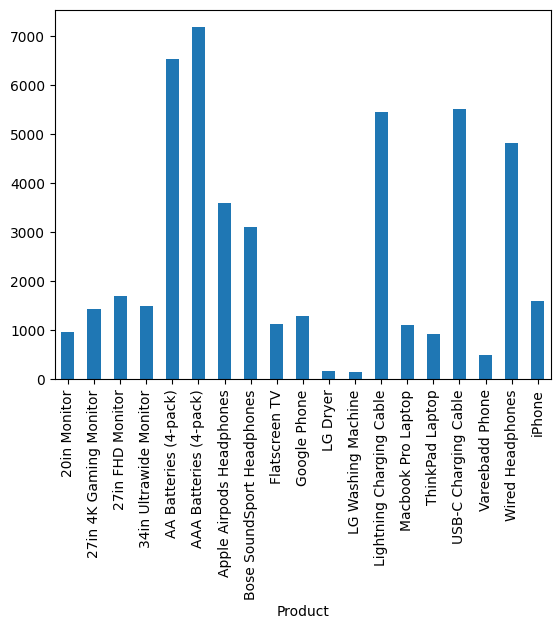

In [33]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [34]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [35]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
price=all_data.groupby('Product')['Price Each'].mean()

[Text(0.0, 0, '20in Monitor'),
 Text(1.0, 0, '27in 4K Gaming Monitor'),
 Text(2.0, 0, '27in FHD Monitor'),
 Text(3.0, 0, '34in Ultrawide Monitor'),
 Text(4.0, 0, 'AA Batteries (4-pack)'),
 Text(5.0, 0, 'AAA Batteries (4-pack)'),
 Text(6.0, 0, 'Apple Airpods Headphones'),
 Text(7.0, 0, 'Bose SoundSport Headphones'),
 Text(8.0, 0, 'Flatscreen TV'),
 Text(9.0, 0, 'Google Phone'),
 Text(10.0, 0, 'LG Dryer'),
 Text(11.0, 0, 'LG Washing Machine'),
 Text(12.0, 0, 'Lightning Charging Cable'),
 Text(13.0, 0, 'Macbook Pro Laptop'),
 Text(14.0, 0, 'ThinkPad Laptop'),
 Text(15.0, 0, 'USB-C Charging Cable'),
 Text(16.0, 0, 'Vareebadd Phone'),
 Text(17.0, 0, 'Wired Headphones'),
 Text(18.0, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

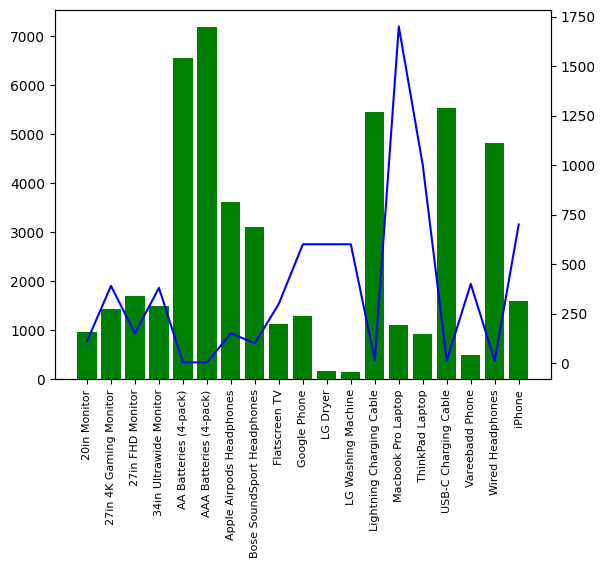

In [44]:

plt.figure(figsize=(40, 24))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, price, color='b')
ax1.set_xticks(products)
ax1.set_xticklabels(products, rotation='vertical', size=8)




*What products are most often sold together?*

In [45]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(15)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
16,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,600.00,Boston,12
17,17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,11.95,Boston,12
18,18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,99.99,Boston,12
19,19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,11.99,Boston,12
36,36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",2019-12-13 14:32:00,400.00,New York City,14
37,37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",2019-12-13 14:32:00,23.90,New York City,14
42,42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",2019-12-17 12:27:00,3.84,Austin,12
43,43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",2019-12-17 12:27:00,99.99,Austin,12
66,66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",2019-12-25 14:49:00,700.00,Boston,14
67,67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",2019-12-25 14:49:00,14.95,Boston,14


In [46]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:  ',' .join(x))


<ipython-input-46-5046b5f3cfed>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
df.shape

(3383, 12)

In [48]:
df2 = df.drop_duplicates(subset=['Order ID'])

<Axes: ylabel='Grouped'>

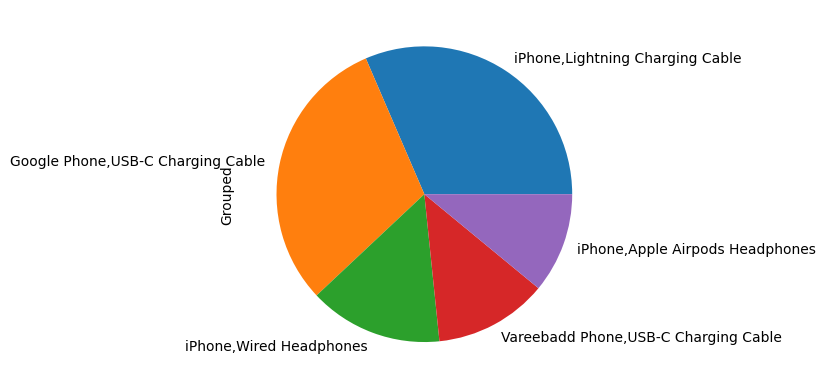

In [53]:
df2['Grouped'].value_counts()[0:5].plot.pie()


In [55]:
values = df2['Grouped'].value_counts()[0:5]
labels =df['Grouped'].value_counts()[0:5].index


In [57]:
trace = go.Figure(data=[go.Pie(labels=labels, values=values,
                               hoverinfo='label+percent', textinfo='value',
                               textfont=dict(size=25),
                               pull=[0, 0, 0, 0.2, 0])])

trace.show()